In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [158]:
# read data from csv file
dataframe = pd .read_csv("../data_source/StudentsPerformance.csv")
dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [159]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [160]:
dataframe.shape

(1000, 8)

1. dataframe.describe(): This method generates descriptive statistics for the DataFrame. By default, it only provides a summary for numerical columns (like mean, standard deviation, minimum, maximum, and percentiles).

2. dataframe.describe(include="all").T is a powerful pandas command used for comprehensive initial data analysis. 
It generates a summary of descriptive statistics for all columns, and then transposes that summary for easier readability


In [161]:

dataframe.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


1. The test was scored out of a maximum of 100 points, giving a total possible range of 100 points (100 - 0).
2. A standard deviation of 15 is 15% of the total possible range. This is significant enough to be considered a moderate spread.
3. A "Small" Spread Example (Consistent Class): If the std was only 2 points, every student would be scoring between roughly 64 and 68 (mean ± 2). The data would be highly clustered around the mean.
4. A "Large" Spread Example (Chaotic Class): If the std was 30 points, the typical range would be 66 ± 30 (36 to 96). The scores would be very spread out, indicating a wide variety of understanding in the classroom.

1. When the mean and median are different, it tells you the shape of your data is skewed, not symmetric. This means there are outliers—extreme scores—that are pulling the average away from the middle student's score.

2. The median is robust; it sits in the middle regardless of how extreme the top or bottom scores are. The mean, however, gets tugged around by those extreme values.

# Part 2: What does it mean if my mean is not close to the median?
## When the mean and median are different, it tells you the shape of your data is skewed, not symmetric. This means there are outliers—extreme scores—that are pulling the average away from the middle student's score.
1. The median is robust; it sits in the middle regardless of how extreme the top or bottom scores are. The mean, however, gets tugged around by those extreme values.


Scenario A: Mean is lower than the Median (Left/Negative Skew)
The Story: A few very low scores are dragging the average down.
Imagine your scores are mostly high: 80, 85, 90, 90, 10.
Median = 85 (the middle score)
Mean = 71 (pulled down by the 10)
The mean is significantly lower than the median. This indicates a general high performance for most students, but a few failing grades made the average look worse than the typical student's grade.


Scenario B: Mean is higher than the Median (Right/Positive Skew)
The Story: A few very high scores are boosting the average up.
Imagine your scores are mostly low: 30, 40, 50, 50, 100.
Median = 50 (the middle score)
Mean = 54 (pulled up slightly by the 100)
The mean is higher than the median. This indicates a general lower performance for most students, but a few perfect scores made the average look better than the typical student's grade.

In your specific case (Mean 66.09 ≈ Median 66), the difference is negligible, meaning your data is nearly perfectly symmetrical, with no significant skewing outliers.


In [162]:
dataframe['gender'].value_counts()


gender
female    518
male      482
Name: count, dtype: int64

In [163]:
dataframe.isnull().sum()    

# NO NULL ALUES PRESENT

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [164]:
dataframe.duplicated().sum()

np.int64(0)

In [165]:
dataframe[dataframe['math score'] == 0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [166]:
dataframe[dataframe['math score'] > 60]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
998,female,group D,some college,standard,completed,68,78,77


In [167]:
dataframe[['math score','reading score','writing score']].corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


# Univariate EDA 

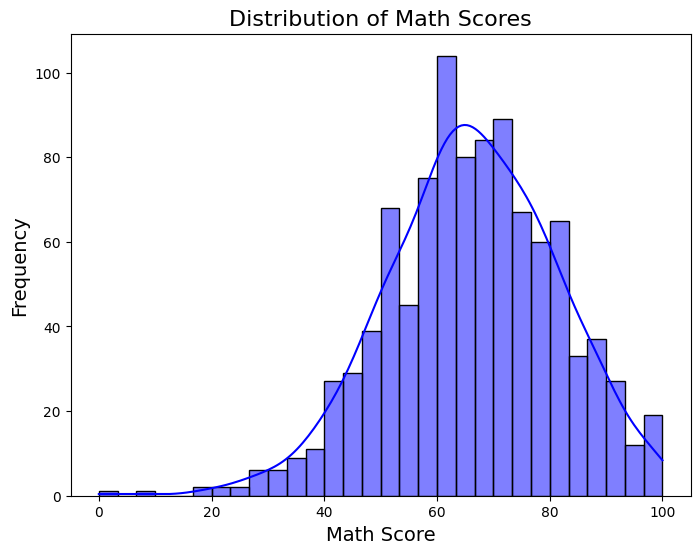

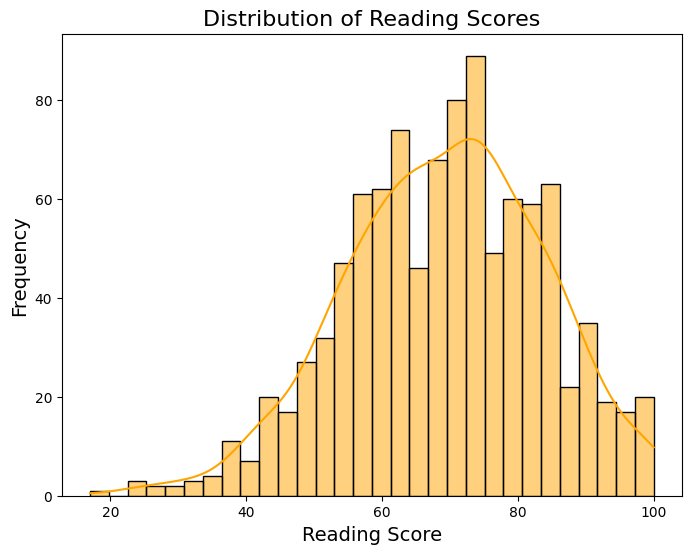

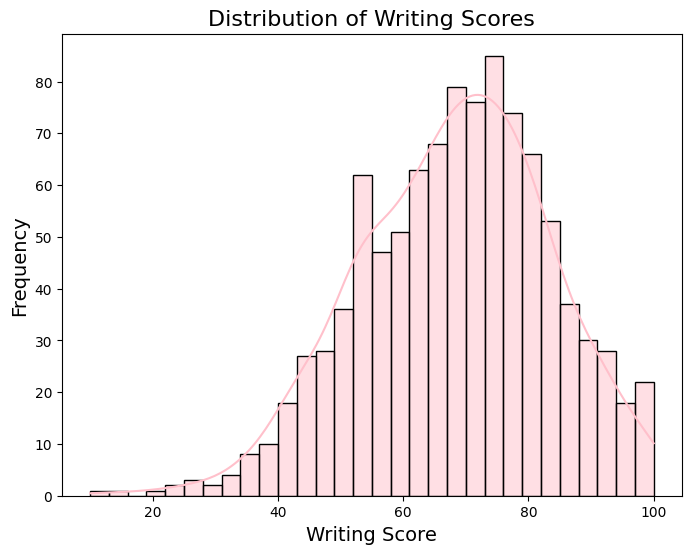

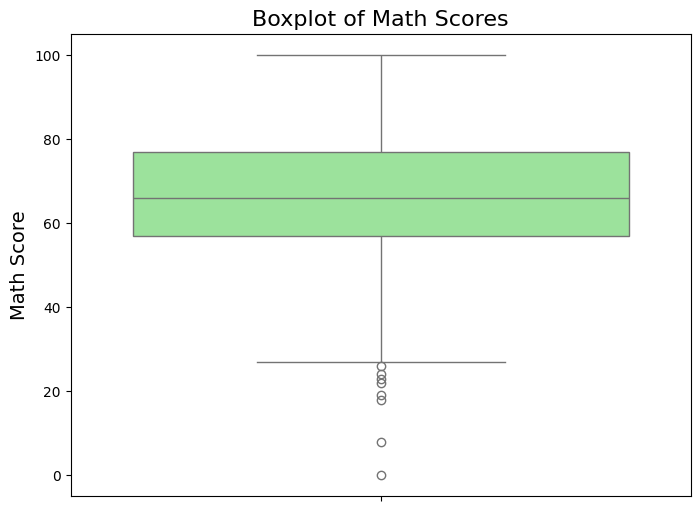

In [168]:
plt.figure(figsize=(8,6))
sns.histplot(dataframe['math score'],kde=True,bins=30,color='blue')
plt.title('Distribution of Math Scores',fontsize=16)
plt.xlabel('Math Score',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(dataframe['reading score'],kde=True,bins=30,color='orange')
plt.title('Distribution of Reading Scores',fontsize=16)
plt.xlabel('Reading Score',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()


plt.figure(figsize=(8,6))
sns.histplot(dataframe['writing score'],kde=True,bins=30,color='pink')
plt.title('Distribution of Writing Scores',fontsize=16)
plt.xlabel('Writing Score',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()


plt.figure(figsize=(8,6))
sns.boxplot(y = dataframe['math score'], color='lightgreen')
plt.title('Boxplot of Math Scores', fontsize=16)
plt.ylabel('Math Score', fontsize=14)
plt.show()

<Axes: xlabel='test preparation course', ylabel='math score'>

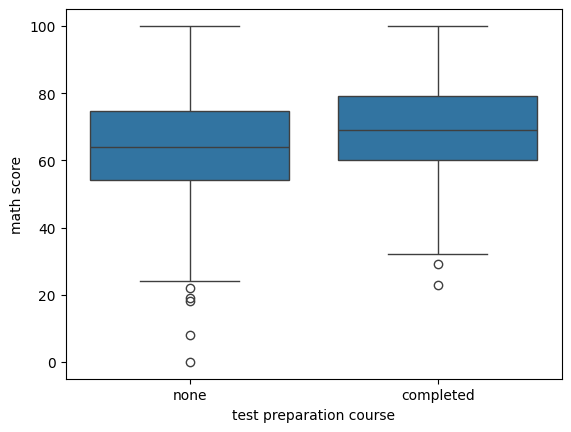

In [169]:
sns.boxplot(x='test preparation course', y='math score', data=dataframe)


<Axes: xlabel='parental level of education', ylabel='math score'>

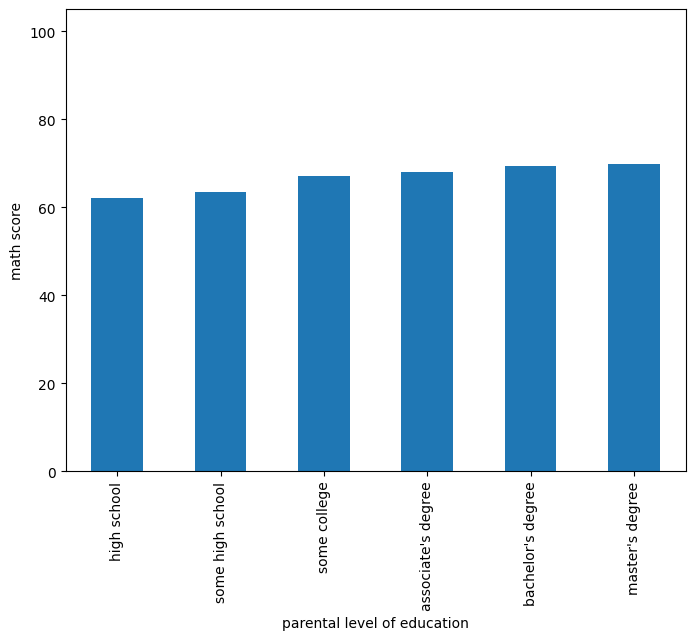

In [170]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='reading score', y='math score', data=dataframe)
dataframe.groupby('parental level of education')['math score'].mean().sort_values().plot(kind='bar')


Correlation among numeric scores

In [171]:
dataframe[['math score','reading score','writing score']].corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: >

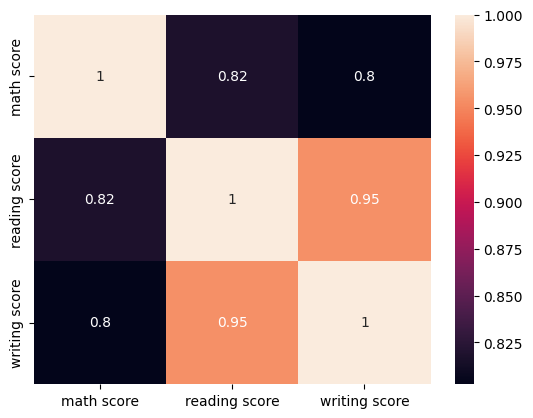

In [172]:

sns.heatmap(dataframe[['math score','reading score','writing score']].corr(), annot=True)


## Feature Enineering 
1. adding new useful columns in pass, fail, avg_score, 

In [173]:
dataframe['pass_math'] = np.where(dataframe['math score'] >= 75, 1, 0)
dataframe

# new column added for pass in math if marks >=75 then pass - 1 , else fail - 0

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1
996,male,group C,high school,free/reduced,none,62,55,55,0
997,female,group C,high school,free/reduced,completed,59,71,65,0
998,female,group D,some college,standard,completed,68,78,77,0


In [174]:
dataframe['avg_score'] = dataframe[['math score', 'reading score', 'writing score']].mean(axis=1)
dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,0,72.666667
1,female,group C,some college,standard,completed,69,90,88,0,82.333333
2,female,group B,master's degree,standard,none,90,95,93,1,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,49.333333
4,male,group C,some college,standard,none,76,78,75,1,76.333333


In [175]:
dataframe['prep_flag'] = (dataframe['test preparation course'] == 'completed').astype(int)
dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,avg_score,prep_flag
0,female,group B,bachelor's degree,standard,none,72,72,74,0,72.666667,0
1,female,group C,some college,standard,completed,69,90,88,0,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,1,92.666667,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,49.333333,0
4,male,group C,some college,standard,none,76,78,75,1,76.333333,0


In [176]:
dataframe['reading_high'] = (dataframe['reading score'] > dataframe['reading score'].median()).astype(int)
dataframe.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,avg_score,prep_flag,reading_high
0,female,group B,bachelor's degree,standard,none,72,72,74,0,72.666667,0,1
1,female,group C,some college,standard,completed,69,90,88,0,82.333333,1,1
2,female,group B,master's degree,standard,none,90,95,93,1,92.666667,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,49.333333,0,0
4,male,group C,some college,standard,none,76,78,75,1,76.333333,0,1


<Axes: xlabel='test preparation course', ylabel='math score'>

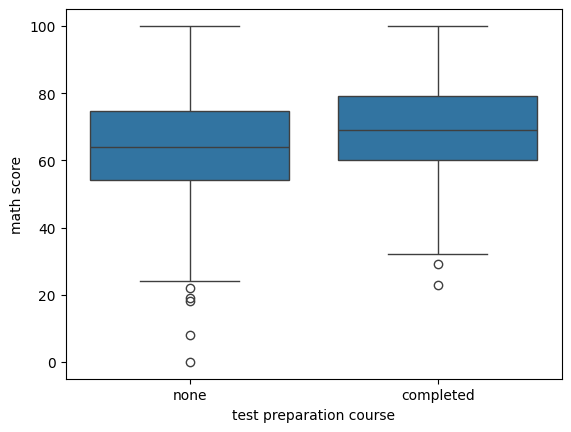

In [177]:
sns.boxplot(x='test preparation course', y='math score', data=dataframe)


In [178]:
dataframe[['math score','reading score','writing score']].describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [179]:
dataframe['math score'].skew()


np.float64(-0.27893514909431694)

<Axes: xlabel='math score', ylabel='Count'>

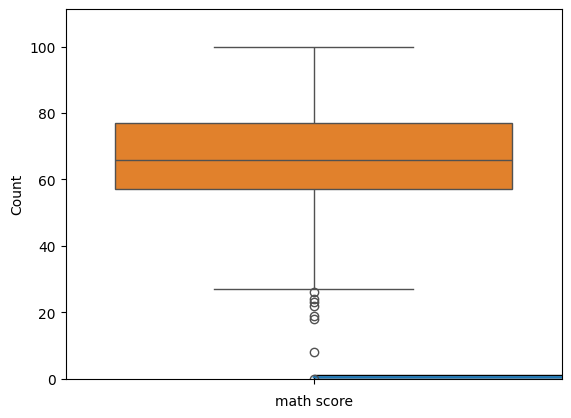

In [180]:
# numeric summary + skew
dataframe[['math score','reading score','writing score']].describe()
dataframe['math score'].skew()

# plots
sns.histplot(dataframe['math score'], kde=True)
sns.boxplot(y=dataframe['math score'])

3.4 Group means to test hypotheses

In [181]:
# gender effect

dataframe.groupby('gender')[['math score','reading score','writing score']].mean()


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [182]:
# test prep effect
dataframe.groupby('test preparation course')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [183]:
# parental education effect (sorted)
dataframe.groupby('parental level of education')['math score'].mean().sort_values()

parental level of education
high school           62.137755
some high school      63.497207
some college          67.128319
associate's degree    67.882883
bachelor's degree     69.389831
master's degree       69.745763
Name: math score, dtype: float64

Predict math score from reading & writing score using Linear regression

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Predict math score from reading & writing score using Linear regression
# separating input & output features

X = dataframe[['reading score', 'writing score']]
y = dataframe['math score']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [186]:
# model object creation 
model = LinearRegression()

# fit and transormation the train data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_score_val = r2_score(y_test, y_pred) 

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2_score_val}') 

Mean Squared Error: 77.24297821278955
Root Mean Squared Error: 8.788798451027851
R^2 Score: 0.6825697127424626


Adding a stronger tree-based model (RandomForest) and compare

In [187]:
from sklearn.ensemble import RandomForestRegressor
 
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_score_val = r2_score(y_test, y_pred_rf) 

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2_score_val}') 

Mean Squared Error: 106.03214293577639
Root Mean Squared Error: 10.297191021622178
R^2 Score: 0.5642605403184355


Cross Valiation & Hyperparameter Tuning

In [188]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(RandomForestRegressor(n_estimators=200, random_state=42),
                         X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
print("CV MAE:", -np.mean(scores), "±", np.std(scores))


CV MAE: 7.9630113807013645 ± 0.5509978191810411


Building a simple sklearn Pipeline and saved the model

In [189]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
import os

os.makedirs('models', exist_ok=True)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

pipe.fit(X_train, y_train)
joblib.dump(pipe, 'models/student_rf_pipeline.pkl')


['models/student_rf_pipeline.pkl']

feature importance (and SHAP optional)

reading score    0.691695
writing score    0.308305
dtype: float64


<Axes: >

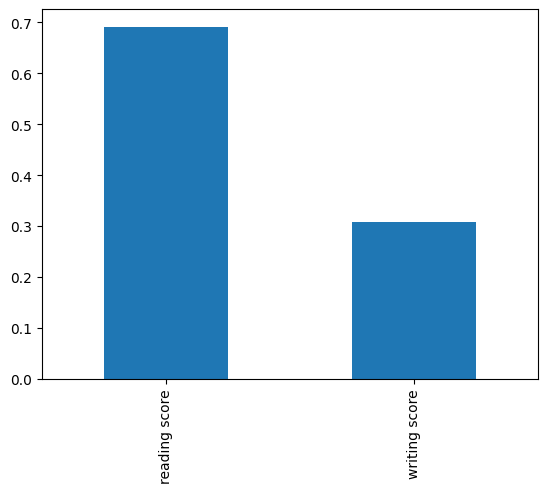

In [190]:
import pandas as pd
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(imp)
imp.plot(kind='bar')


In [191]:
[df_col for df_col in dataframe.columns if 'math' in df_col.lower()]


['math score', 'pass_math']

Checking are the predictions identical?

In [192]:
print("Are the predictions identical (close) for algorithms from 2 different families? -----> ", np.allclose(y_pred, y_pred_rf) )
print("Mean diff (lr - rf):", np.mean(y_pred - y_pred_rf))

#  Show head of truth vs preds (first 10)
pd.DataFrame({'y_true': y_test.values[:10], 'pred_lr': y_pred[:10], 'pred_rf': y_pred_rf[:10]})

Are the predictions identical (close) for algorithms from 2 different families? ----->  False
Mean diff (lr - rf): 0.44710317195183036


,y_true,pred_lr,pred_rf
0,91,80.185526,69.074333
1,53,65.684950,65.198167
2,80,69.442109,69.576000
3,74,72.016110,71.103155
4,84,76.828277,70.650000
5,81,72.223797,69.174333
6,69,65.269576,61.091500
7,54,59.817775,58.142429
8,87,69.442109,69.576000
9,51,50.081864,49.440000


reading score    0.691695
writing score    0.308305
dtype: float64


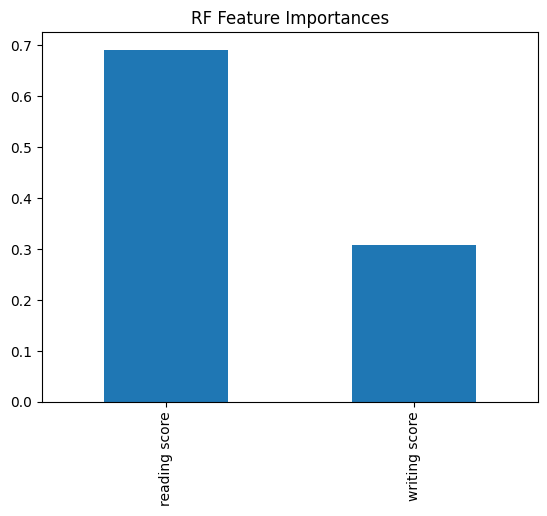

In [ ]:
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(imp)
imp.plot(kind='bar', title='RF Feature Importances'); plt.show()

# This tells you which features the model relied on most. 

# Checks & fixes why my Random Forest model is performing worse than Linear Regression Model?

1. Target Leakage check
2. Comparing the predictions and doing quick sanity checks
3. Compute MAE + cross-validated MAE for robust comparison
4. Examine feature importances & coefficients - If LR is winning, inspect coefficients; for RF inspect importances.
5. Residuals & Actual vs Pred plot (visual sanity)

Features in X: ['reading score', 'writing score']
-------------------------------------------------------------
Features indicating potential target leakage: []
-------------------------------------------------------------
Difference in predictions (LR - RF): 0.44710317195183036
--------------------------------------------------------------
are predictions identical for Linear Regression and Random Forest models? --->  False
-------------------------------------------------------------
Test MAE LR: 7.351308782530512
Test MAE RF: 8.286978492063492
-------------------------------------------------------------
CV MAE RF: 7.955555870352685
CV MAE LR: 7.0676002668863305
-------------------------------------------------------------
Feature importance (RF)
reading score    0.691695
writing score    0.308305
dtype: float64
-------------------------------------------------------------
Coefficients (Linear Regression)
reading score    0.575560
writing score    0.271761
dtype: float64
-----------

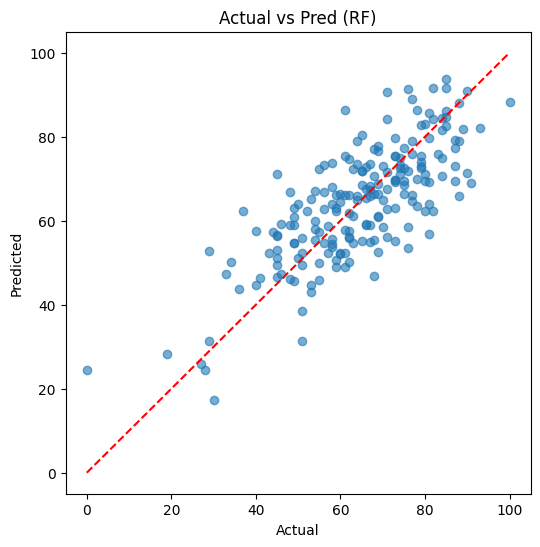

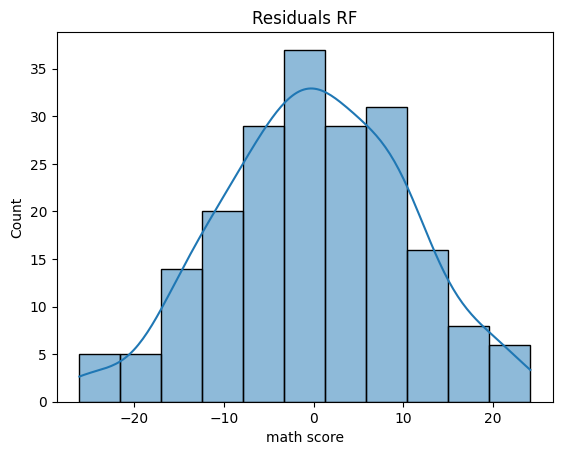

In [213]:
# Checks & fixes why my Random Forest model is performing worse than Linear Regression Model?

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# 1. show all feature columns for X
print("Features in X:", X.columns.tolist())
print("-------------------------------------------------------------")

# 2. check if any feature name contains 'math' or 'avg'
input_cols = [feature for feature in X.columns if 'math' in feature.lower() or 'avg' in feature.lower()]
print("Features indicating potential target leakage:", input_cols)
print("-------------------------------------------------------------")

print("Difference in predictions (LR - RF):", np.mean(y_pred - y_pred_rf))

print("--------------------------------------------------------------")

# 3. Comparing predictions and quick sanity checks
print("are predictions identical for Linear Regression and Random Forest models? ---> ", np.allclose(y_pred, y_pred_rf))
print("-------------------------------------------------------------")

pd.DataFrame({
    'y_true': y_test.values[:10],
    'pred_lr': y_pred[:10],
    'pred_rf': y_pred_rf[:10]
})

print("Test MAE LR:", mean_absolute_error(y_test, y_pred))
print("Test MAE RF:", mean_absolute_error(y_test, y_pred_rf))
print("-------------------------------------------------------------")

cv_mae_rf = -np.mean(cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42),
                                     X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1))

cv_mae_lr = -np.mean(cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1))
print("CV MAE RF:", cv_mae_rf)
print("CV MAE LR:", cv_mae_lr)

print("-------------------------------------------------------------")

# Feature importance (RF)
import pandas as pd
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importance (RF)")
print(imp)
print("-------------------------------------------------------------")
# Coefficients (Linear Regression)
coef = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("Coefficients (Linear Regression)")
print(coef)

print("-------------------------------------------------------------")

import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Pred (RF)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([0,100],[0,100],'r--')
plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Actual vs Pred (RF)')
plt.show()

# Residuals
res_rf = y_test - y_pred_rf
sns.histplot(res_rf, kde=True); plt.title('Residuals RF'); plt.show()


# Inferences -

1. No target leak as the features used as input to train the model do not have any output target computed value.
2. The prdictions are not identical - false 
3. The difference in predictions is (LR - RF): 0.44710317195183036 - small but nonzero.
4. MAE Errors in Random forest is higher than in Linear Regression.
5. R2 score is better in Linear Regression, model covers 68% of variance.
6. Feature effects: reading is dominant (RF importance ≈ 0.69; LR coef ≈ 0.576). Writing contributes less but meaningfully.


Interpretation: 
1. The relationship between (reading, writing) and math is strongly linear and mostly captured by LR. 
2. RF is underperforming here either because (a) there is little nonlinearity to learn, or (b) RF is under-tuned / overfitting without enough features. 
3. With only two highly-correlated academic scores, LR’s simplicity wins.

since no leakage, quick RF improvements using Grid SearchCV

In [211]:
from sklearn.model_selection import GridSearchCV
param_grid = {
  'n_estimators': [100, 300],
  'max_depth': [None, 8, 12],
  'min_samples_leaf': [1, 3]
}
gs = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                  param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
gs.fit(X_train, y_train)
print("best:", gs.best_params_, "best_score:", -gs.best_score_)
best_rf = gs.best_estimator_


best: {'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 300} best_score: 7.499442594661058
